In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit

In [45]:
df = pd.read_excel("daily_data.xlsx")
df.head()

,confirm,date,dead,heal,suspect
0,41,1.13,1,0,0
1,41,1.14,1,0,0
2,41,1.15,2,5,0
3,45,1.16,2,8,0
4,62,1.17,2,12,0


In [28]:
t = list(range(13,13 + len(df),1))
t = np.array(t).astype(int)
y = np.array(list(df["confirm"])).astype(int)

时间t :
 [13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
确诊人数 :
 [  41   41   41   45   62  198  275  291  440  571  830 1287 1975 2744
 4515 5974 7711]
a,b,c,d = :
 [ 5.26169591e+00 -2.76422472e+02  4.80349024e+03 -2.74304487e+04]
多项式曲线拟合函数 :
        3         2
5.262 x - 276.4 x + 4803 x - 2.743e+04


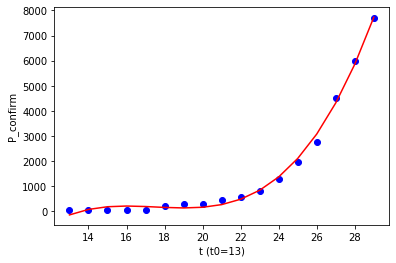

In [55]:
print("时间t :\n",t)
print("确诊人数 :\n",y)
f1 = np.polyfit(t,y,3)
print("a,b,c,d = :\n",f1)
# 返回拟合函数
p1 = np.poly1d(f1)
print("多项式曲线拟合函数 :\n",p1)
yvals = np.polyval(f1,t)
plot1 = plt.plot(t,y,"ob")
plot2 = plt.plot(t,yvals,"r")
plt.xlabel("t (t0=13)")
plt.ylabel("P_confirm")
plt.show()

In [70]:
#定义函数
def L(t,p0,r1):   
    return p0*np.exp(r1*t)

In [71]:
popt,pcov = curve_fit(L,t,y)

按照J型增长,自然增长率 r1 = 0.34243812944795793 (天)推算,从发病之日起(12月31日):
30天后，预计感染11286
35天后，预计感染62538
40天后，预计感染346529
45天后，预计感染1920151
50天后，预计感染10639727
55天后，预计感染58955655
60天后，预计感染326678400
65天后，预计感染1810153360
70天后，预计感染10030216814
75天后，预计感染55578301571


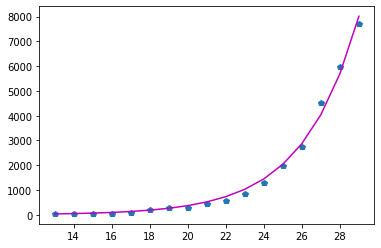

In [73]:
P0 = popt[0]
r1 = popt[1]
yvals = L(t,P0,r1)
print("按照J型增长,自然增长率 r1 = " + str(r1) + " (天)推算,从发病之日起(12月31日):")
plot1 = plt.plot(t,y,"p")
plot2 = plt.plot(t,yvals,"m")
for i in range(30,80,5):
    if int(L(i,P0,r1)) <100000000000:
        print(str(i) + "天后，预计感染" + str(int(L(i,P0,r1))))

In [74]:
def S(t,K,p0,r2):
    t0 = 13   #定义13号为初始时间
    exp_value=np.exp(r2*(t-t0))
    return (K*exp_value*p0)/(K+(exp_value-1)*p0)

按照目前的控制水平，阻滞增长模型S型增长率为0.47179446312327517,最大患病数为15870


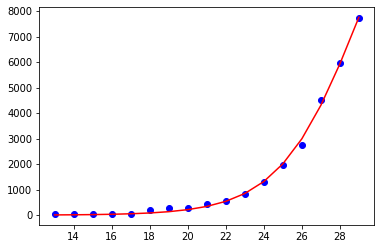

In [84]:
popt,pcov = curve_fit(S,t,y)
K = popt[0]
p0 = popt[1]
r2 = popt[2]
print("按照目前的控制水平，阻滞增长模型S型增长率为" + str(r2) + ",最大患病数为" +str(int(K)))
yvals_1 = S(t,K,p0,r2)
plot1 = plt.plot(t,y,"ob")
plot1 = plt.plot(t,yvals_1,"r")

In [87]:
print("按照29号之前的控制方案，未来10天感染人数:")
data = []
for i in range(30,40):
    if i < 31:
        data.append(["1-" + str(i + 1),int(S(i,K,p0,r2))])
    else:
        data.append(["2-" + str(i-int(30)),int(S(i,K,p0,r2))])
pre_data = pd.DataFrame(data)
pre_data
    

按照29号之前的控制方案，未来10天感染人数:


,0,1
0,1-31,9606
1,2-1,11281
2,2-2,12657
3,2-3,13700
4,2-4,14443
5,2-5,14949
6,2-6,15282
7,2-7,15498
8,2-8,15636
9,2-9,15723


Text(0.5, 1.0, 'Model_S prediction')

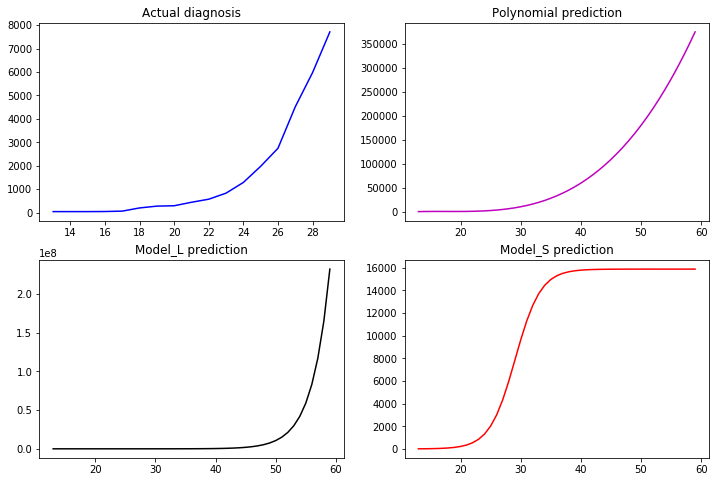

In [121]:
t1 = np.array(range(13,60,1))
model_F = np.polyval(f1,t1)
model_L = L(t1,P0,r1)
model_S = S(t1,K,p0,r2)
plt.figure(figsize=(12, 8))
plt.subplot(2,  2,  1) 
plot1 = plt.plot(t,y,"b")
plt.title('Actual diagnosis')
plt.subplot(2,  2,  2) 
plot2 = plt.plot(t1,model_F,"m")
plt.title('Polynomial prediction')
plt.subplot(2,  2,  3) 
plot3 = plt.plot(t1,model_L,"k")
plt.title('Model_L prediction')
plt.subplot(2,  2,  4) 
plot4 = plt.plot(t1,model_S,"r")
plt.title('Model_S prediction')